In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import PiecewiseQuadratic, BiWeight

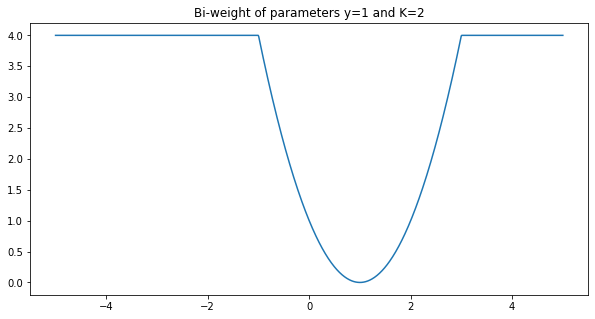

In [2]:
bi_weight = BiWeight(1, 2)
t = np.linspace(-5, 5, 1000)
y = np.array([bi_weight(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.title("Bi-weight of parameters y=1 and K=2")
plt.show()

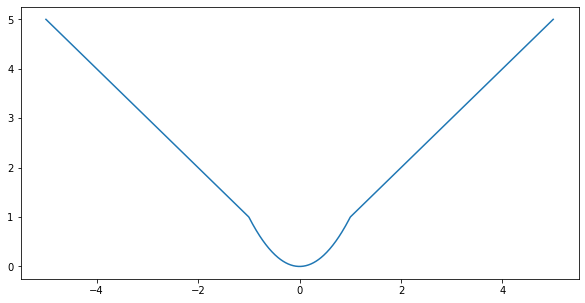

In [4]:
polynom = PiecewiseQuadratic([(-10,-1),(-1,1),(1,10)], [[-1,0],[1,0,0],[1,0]])
t = np.linspace(-5, 5, 1000)
y = np.array([polynom(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)